# Математические пакеты.
# Лабораторная работа №1: Цифровая обработка сигналов

Выполнил студент группы 9381 Судаков Евгений, вариант 16.

## Цель работы
Изучить возможности библиотек Python для решения цифровых задач обработки сигналов.

## Задачи
1. Освоить Jupyter Notebook.
2. Выполнить загрузку аудио сигнала и построить огибающую (график).
3. Фильтрация (выбрать один из 4 типов фильтров). Получить фильтрованный сигнал.
4. Детектор сигнал/шум. Получить сигнал после детектирования.
5. Эффект "Эхо". Получить сигнал после работы аудио-эффекта.
6. **Бонусное задание**: эффект Distortion (классический вариант). Получить сигнал после работы аудио-эффекта.

## Теоретические положения

### Огибающая

Имеется сигнал $x(i),i=0,1,...,N-1$. Хотим построить огибающую $y(j),j=0,1,...,n-1$.
Пусть $m=[{N\over n}]$ - число точек в интервале усреднения (порядок фильтра). Тогда $y(j)={1\over m}\sum\limits_{k=mj}^{mj+m-1}|x(k)|$.

### Фильтрация


Основные типы фильтров: нижних частот (ФНЧ), верхних частот (ФВЧ), полосовой (ПФ), режекторный (РФ).

**Фильтр нижних частот (ФНЧ)** — эффективно пропускает частотный спектр сигнала ниже некоторой частоты (частоты среза) и подавляет частоты сигнала выше этой частоты. От нулевой частоты до частоты среза ФНЧ находится полоса частот пропускания, справа - полоса частот подавления.

**Фильтр верхних частот (ФВЧ)** - пропускает высокие частоты входного сигнала, при этом подавляя частоты сигнала ниже частоты среза.

**Полосовой фильтр (ПФ)** - пропускает составляющие, находящиеся в некоторой полосе частот.

**Режекторный фильтр (РФ)** - не пропускающий колебания некоторой определённой полосы частот и пропускающий колебания с частотами, выходящими за пределы этой полосы.

### Пример ФНЧ фильтрации
Пусть $F_d$ - частота дискретизации, $F_s$ - частота среза, $m$ - порядок фильтра. Тогда вычисляем: $wn=2{F_s\over F_d}$, где $wn$ - относительная частота среза.
### Амплитудный детектор сигнал/шум
Определяем среднее сигнала по амплитуде (без учёта знака): $mid={{\sum\limits_{k=0}^{N-1}{|x(k)|}}\over N}$

Определяем порог детектора - $Th=\alpha * mid$, где $0<\alpha<1$ подбирается экспериментально. Задаём величину "провала" (в отсчётах) - $k$. Обозначим $y(i)$ - сигнал после детектирования.
### Эхо (простейший ревербератор)
Ревербератор реализован, как набор линий задержки. Число линий задержки $N_L>8$. Каждая линия задержки имеет свой весовой коэффициент (задается пользователем): $\alpha_1 > \alpha_2 > ... > \alpha_{N_L}$
Перед добавлением к исходному сигналу, выход ревербератора фильтруется ФНЧ-фильтром первого порядка.
Желаемое соотношение между ”сухим”и обработанным сигналом задается коэффициентом применимости $\gamma$.

Ревербератор может работать в двух режимах: ручной и с использованием готовой конфигурации (preset). Для ручного режима регулируется пользователем задается максимальная задержка $D_1$, а величины остальных определяются автоматически через нее:
$D_i = D_{1}2{{1-i}\over N_L}, i=2,...,N_L$.
Для готовой конфигурации пользователь вручную задает последовательность $D_1 > D_2 > ... > D_{N_L}$.

Начальное значение $D_1$ определяется геометрией помещения, и является расстоянием, пройденным звуком (скорость 335 м/сек) от точки излучения до ближайшего препятствия.

Пример: Допустим, частота дискретизации сигнала 48000 Гц, до ближайшей стены — 10 метров. Звук пройдет это расстояние за ${10\over 335} =$ 0.02985 секунд. Тогда задержка $D_1$ составит 48000 ∗ 0.02985 = 1433 отсчета сигнала.
### Класический Distortion
Обозначим входной сигнал и выходной сигналы, соответственно как $x(i)$ и $y(i), i = 0,1, . . . ,N − 1$. Пользователь задает порог— $Th$ и максимальное значение сигнала $Max$, $Th < Max$. Тогда
$$\begin{equation*}
Y(i) = 
 \begin{cases}
   x(i) ,при \text{$|x(i)|\leq Th$}\\
   Max * sign(x(i)) ,при \text{$|x(i)|>Th$}
 \end{cases}
\end{equation*}$$

## Выполнение лабораторной работы

Первым шагом подключим библиотеки, необходимые для работы с .wav аудио-форматом, выводом графиков, математическими рассчетами: 

In [37]:
from scipy import signal  as sig
from scipy.io import wavfile
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd
import wave
import math

audio = '03-01-05-01-01-01-16_A16.wav'

ipd.Audio(audio)

Выведем основную информацию об аудио-потоке:

In [38]:
wav = wave.open(audio, mode="r")
(nchannels, sampwidth, framerate, nframes, comptype, compname) = wav.getparams()
content = wav.readframes(nframes)

print("Channels number: ", nchannels)
print("Sample width: ", sampwidth)
print("Framerate: ", framerate)
print("Number of frames: ", nframes)
print("Compressoin type: ", comptype)
print("Compression name: ", compname)

Channels number:  1
Sample width:  2
Framerate:  48000
Number of frames:  190591
Compressoin type:  NONE
Compression name:  not compressed


Далее, откроем аудифайл в режиме чтения (бинарного), и выведем график сигнала:

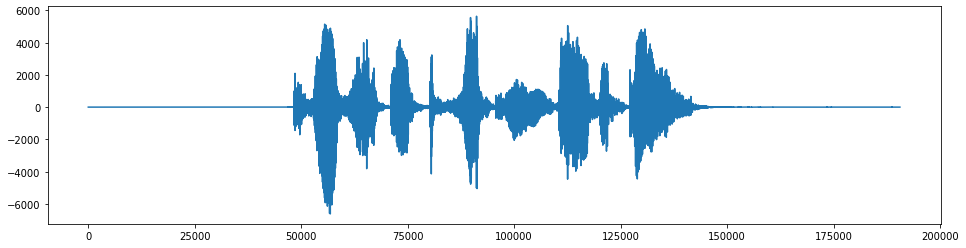

In [39]:
types = { 1: np.int8, 2: np.int16, 4: np.int32 }

audiofile = wave.open(audio, "rb")
signal = np.frombuffer(audiofile.readframes(audiofile.getnframes()), types[audiofile.getsampwidth()])

plt.figure(figsize=(16, 4))
plt.plot(signal)
plt.show()

In [40]:
def signal_envelope(content, length):
    frame_len = len(content) // length

    envelope = []
    for i in range(length):
        sum = 0
        for j in range(frame_len*i, frame_len*i+frame_len-1):
            sum += abs(content[j])
        envelope.append(sum/frame_len)
        
    return envelope

env_len = 500
envelope = signal_envelope(signal, env_len)

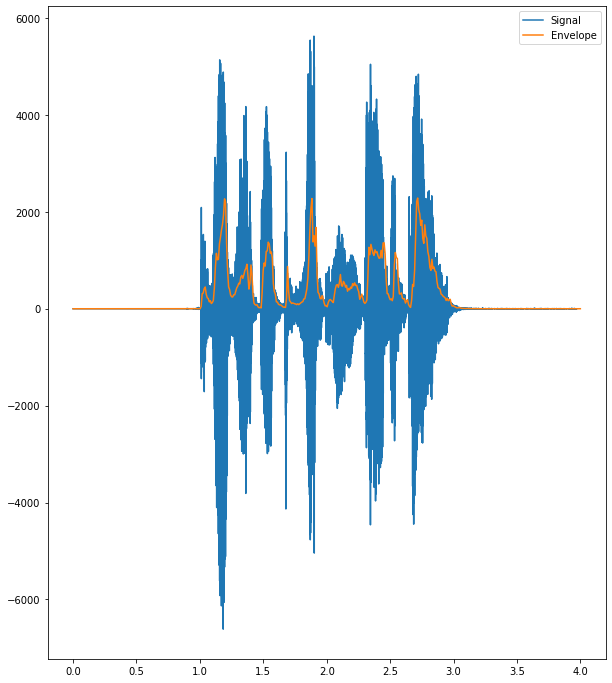

In [41]:
plt.figure(figsize=(10, 12))
signal_lnsp = np.linspace(0, len(signal) / framerate, num=len(signal))
env_lnsp = np.linspace(0, 4, num=len(envelope))
plt.plot(signal_lnsp, signal)
plt.plot(env_lnsp, envelope)
plt.legend(("Signal","Envelope"))
plt.show()

### Фильтрация сигнала

Профильтруем аудио-сигнал с помощью фильтра верхнич частот:

In [149]:
def highpass_filter(signal, order, slice_frequency):
    critical_frequency = 2 * slice_frequency / audiofile.getframerate()
    b, a = sig.butter(order, critical_frequency, "highpass")
    return sig.filtfilt(b, a, signal)

order = 1
slice_frequency = 1000
filtered_signal = highpass_filter(signal, order, slice_frequency)
wavfile.write("highpass.wav", framerate, filtered_signal.astype(types[sampwidth]))
# ipd.Audio(filtered_signal, rate=audiofile.getframerate())

Отобразим на графиках фильтрованный и исходных сигналы:

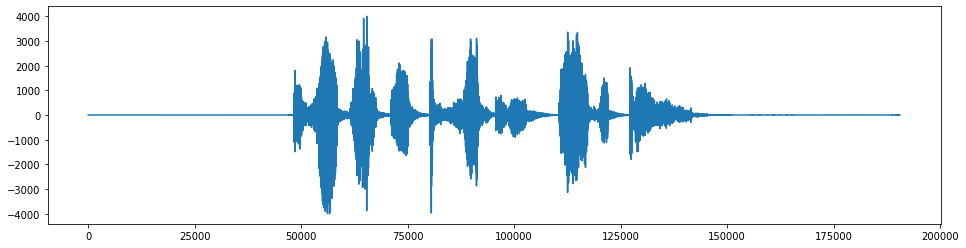

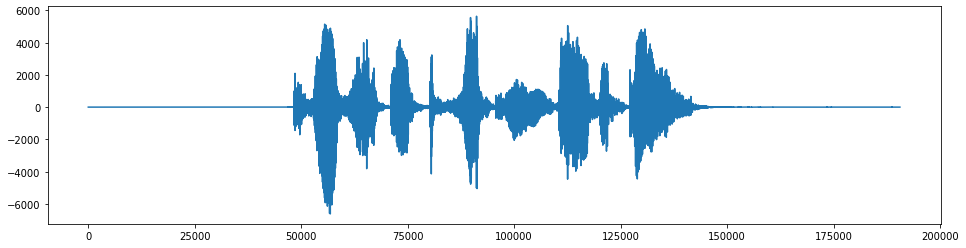

In [48]:
plt.figure(figsize=(16, 4))
plt.plot(filtered_signal)
plt.figure(figsize=(16, 4))
plt.plot(signal)
plt.show()

### Детектор сигнал/шум

`middle_signal` - среднее значение сигнала по амплитуде

`detector_threshold` - порог детектора

`k` - величина провала

Результат отобразим в виде графика


In [147]:
k = 100
alpha = 0.3
middle_signal = np.sum(np.abs(signal)) / len(signal)
detector_threshold = middle_signal * alpha

def detect_signal(signal, detector_threshold):
    signal_length = len(signal)
    detected_signal = np.zeros(signal_length)
    detected = False
    c1 = 0
    c2 = 0
    
    for i in range(signal_length):
        if detected:
            detected_signal[i] = signal[i]

        if np.abs(signal[i]) > detector_threshold:
            c1 += 1
            c2 = 0
        else:
            c1 = 0
            c2 += 1
        
        # найдено начало сигнала
        if c1 >= k:
            detected = True
            for j in range(i - k + 1, i + 1):
                detected_signal[j] = signal[j]
        # найден конец сигнала
        elif c2 >= k:
            detected = False
            for j in range(i - k + 1, i + 1):
                detected_signal[j] = 0
            
    return detected_signal
            
detected_signal = detect_signal(signal, detector_threshold)
wavfile.write("detected.wav", framerate, detected_signal.astype(types[sampwidth]))

In [148]:
ipd.Audio(detected_signal, rate=audiofile.getframerate())

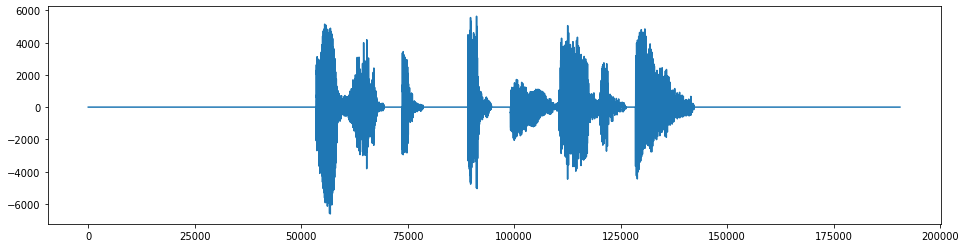

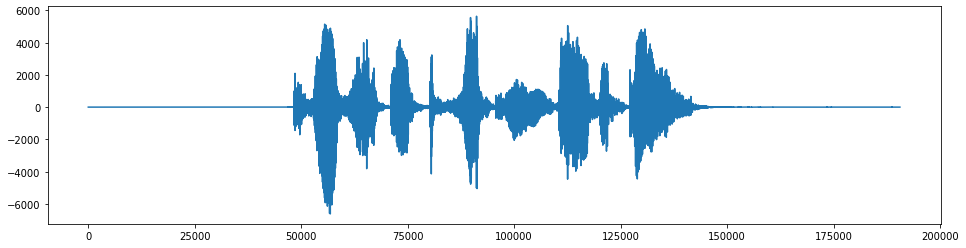

In [74]:
plt.figure(figsize=(16, 4))
plt.plot(detected_signal)
plt.show()

plt.figure(figsize=(16, 4))
plt.plot(signal)
plt.show()

### Реализация эффекта "Эхо"

In [150]:
nlines = 9
lines = [0 for i in range(nlines)]

applicability = 0.5

velocity = 335

inp = input("Input metres: ")

dist = float(inp)/velocity

lines[0] = dist

delay_lines = [0.9, 0.5, 0.25, 0.125, 0.06, 0.03, 0.015, 0.06]

for i in range(1, nlines):
    lines[i] = lines[0] * (2 ** ((-i)/nlines))

echo_signal = [0]*(int((np.sum(lines) + len(signal) / framerate + 1) * framerate))
for i in range(len(signal) - 1):
    n = 0
    for j in range(nlines):
        n+=lines[j]
        try:
            echo_signal[i+int(n*framerate)] += signal[i] * delay_lines[j]   
        except:
            pass
hzm = 1000
wn = 2 * hzm / framerate
x1, x2 = sig.butter(5, wn, "lowpass")
echo_signal_filtered = sig.filtfilt(x1, x2, echo_signal) * applicability

for i in range(len(signal)):
    echo_signal_filtered[i]+=signal[i]
echo_signal_filtered = np.asarray(echo_signal_filtered, dtype=types[sampwidth])    
wavfile.write("echo.wav", framerate, echo_signal_filtered.astype(types[sampwidth]))
ipd.Audio(echo_signal_filtered, rate=audiofile.getframerate())

Input metres:  10


### Реализация эффекта "Distortion"

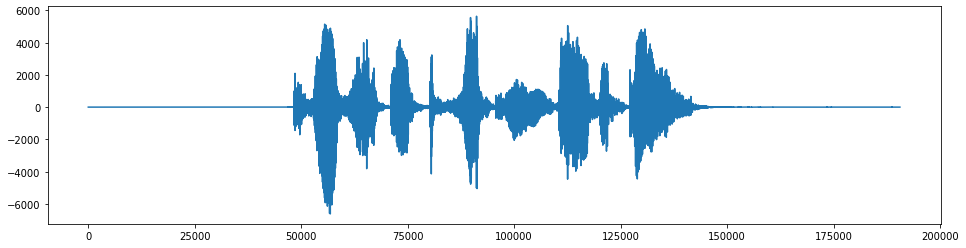

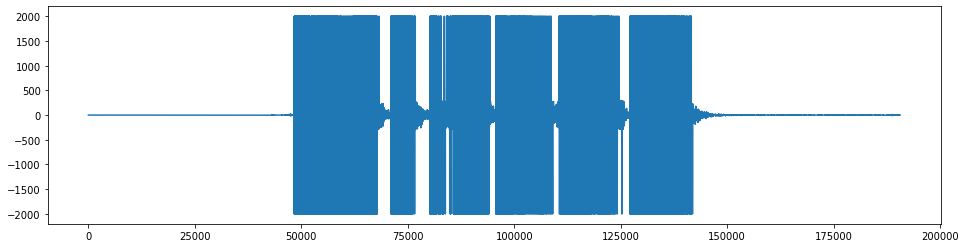

In [151]:
def distortion(signal, max_ampl, threshold):
    res = np.zeros(len(signal))

    for i in range(len(signal)):
        x = signal[i]
        if (abs(x) < threshold):
            res[i] = x
        else:
            res[i] = max_ampl * np.sign(x)
    return res
        

distorted_signal = distortion(signal, 2000, 300)

plt.figure(figsize=(16, 4))
plt.plot(signal)
plt.show()

plt.figure(figsize=(16, 4))
plt.plot(distorted_signal)
plt.show()

wavfile.write("distortion.wav", framerate, distorted_signal.astype(types[sampwidth]))

ipd.Audio(distorted_signal, rate=audiofile.getframerate())

## Вывод

В ходе выполнения лабораторной работы были приобретены базовые навыки работы с jupyter notebook, пакетами scipy, matplotlib, np и др., а также были реализованы базовые алгоритмы цифровой обработки звуковых сигналов.